In [296]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [215]:
cols=['Mpg','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model_Year','Car_Name']
df=pd.read_csv("auto-mpg.csv",names=cols,na_values='?',comment='\t',sep=" ",skipinitialspace=True)
df.head()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Car_Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [216]:
df.tail()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Car_Name
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [217]:
df.shape

(398, 8)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mpg           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model_Year    398 non-null    int64  
 7   Car_Name      398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [219]:
df.describe()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Car_Name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [220]:
df.isnull().sum()

Mpg             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model_Year      0
Car_Name        0
dtype: int64

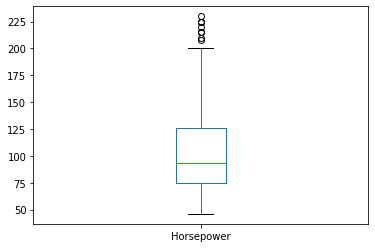

In [221]:
df['Horsepower'].plot.box()

In [222]:
# Imputing Missing values
df['Horsepower'].fillna(df['Horsepower'].median(),inplace=True)

In [223]:
# Again Check missing values
df.isnull().sum()

Mpg             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model_Year      0
Car_Name        0
dtype: int64

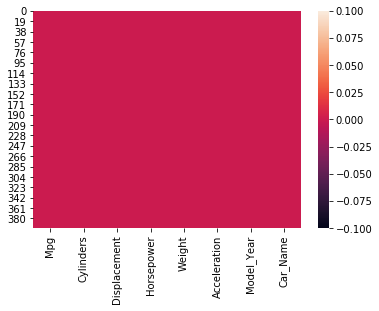

In [224]:
sns.heatmap(df.isnull())

In [225]:
#Checking the unique values and their count
for i in df.columns:
    print(df[i].value_counts())
    print()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
34.2     1
38.1     1
37.2     1
32.1     1
32.7     1
Name: Mpg, Length: 129, dtype: int64

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64

97.0     21
98.0     18
350.0    18
250.0    17
318.0    17
         ..
68.0      1
155.0     1
96.0      1
97.5      1
114.0     1
Name: Displacement, Length: 82, dtype: int64

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
116.0     1
167.0     1
158.0     1
137.0     1
94.0      1
Name: Horsepower, Length: 94, dtype: int64

2130.0    4
1985.0    4
2265.0    3
2125.0    3
2720.0    3
         ..
2215.0    1
2585.0    1
3850.0    1
3449.0    1
3504.0    1
Name: Weight, Length: 351, dtype: int64

14.5    23
15.5    21
16.0    16
14.0    16
13.5    15
        ..
17.1     1
24.6     1
23.5     1
16.1     1
15.6     1
Name: Acceleration, Length: 95, dtype: int64

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29

Univariate Analysis

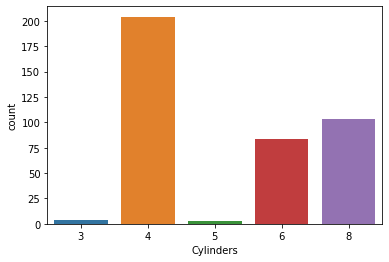

In [226]:
sns.countplot(x="Cylinders",data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
 <a list of 82 Text xticklabel objects>)

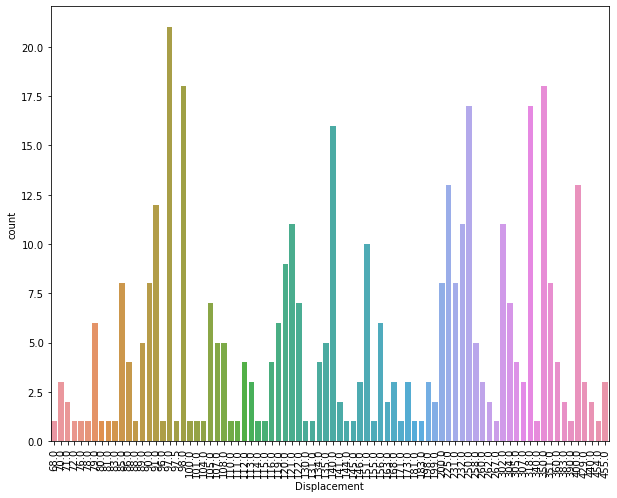

In [227]:
plt.figure(figsize=(10,8))
sns.countplot(x="Displacement",data=df)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

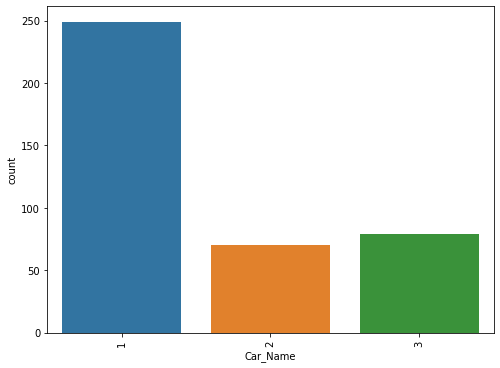

In [228]:
plt.figure(figsize=(8,6))
sns.countplot(x="Car_Name",data=df)
plt.xticks(rotation=90)

Bivariate Analysis

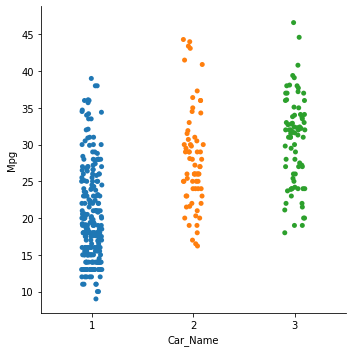

In [229]:
sns.catplot(x="Car_Name",y="Mpg",data=df)

<Figure size 1080x432 with 0 Axes>

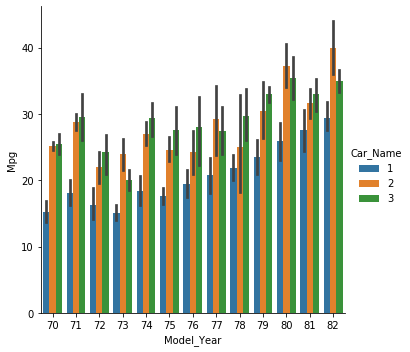

In [230]:
plt.figure(figsize=(15,6))
sns.catplot(y="Mpg",x="Model_Year",hue="Car_Name",data=df,kind="bar")

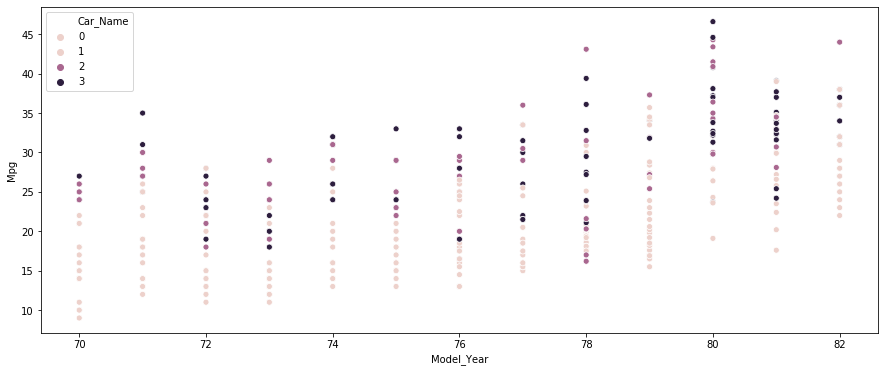

In [231]:
plt.figure(figsize=(15,6))
sns.scatterplot(y="Mpg",x="Model_Year",hue="Car_Name",data=df)

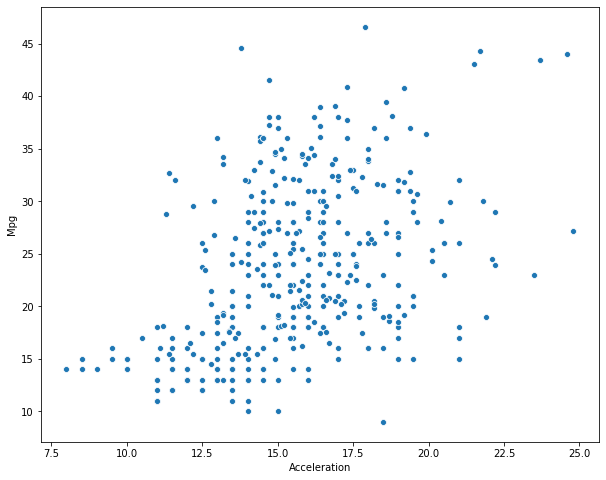

In [232]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Acceleration",y="Mpg",data=df)

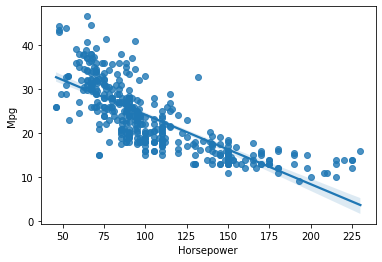

In [233]:
sns.regplot(x="Horsepower",y="Mpg",data=df)

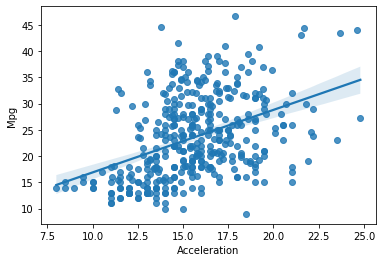

In [234]:
sns.regplot(x="Acceleration",y="Mpg",data=df)

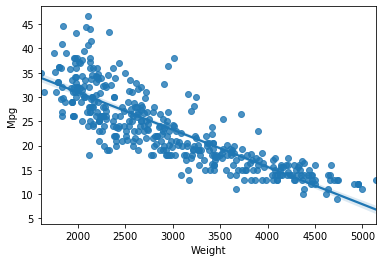

In [235]:
sns.regplot(x="Weight",y="Mpg",data=df)

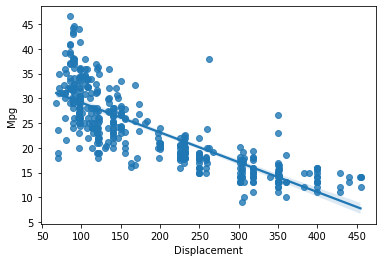

In [236]:
sns.regplot(x="Displacement",y="Mpg",data=df)

In [237]:
# Correlation
df.corr()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Car_Name
Mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
Cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
Displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
Horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
Weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
Acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
Model_Year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
Car_Name,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


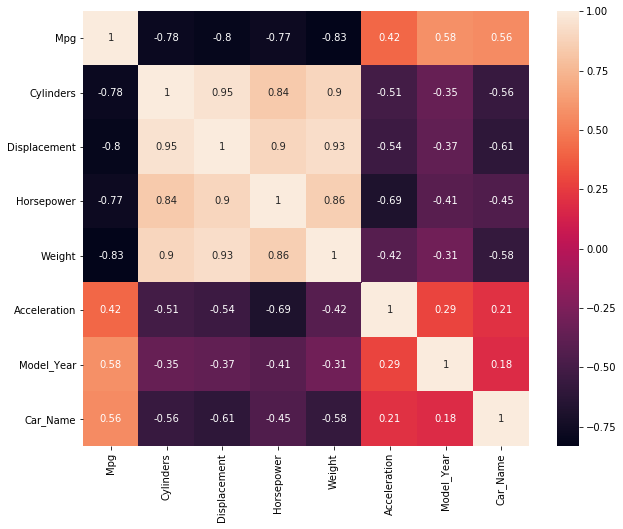

In [238]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

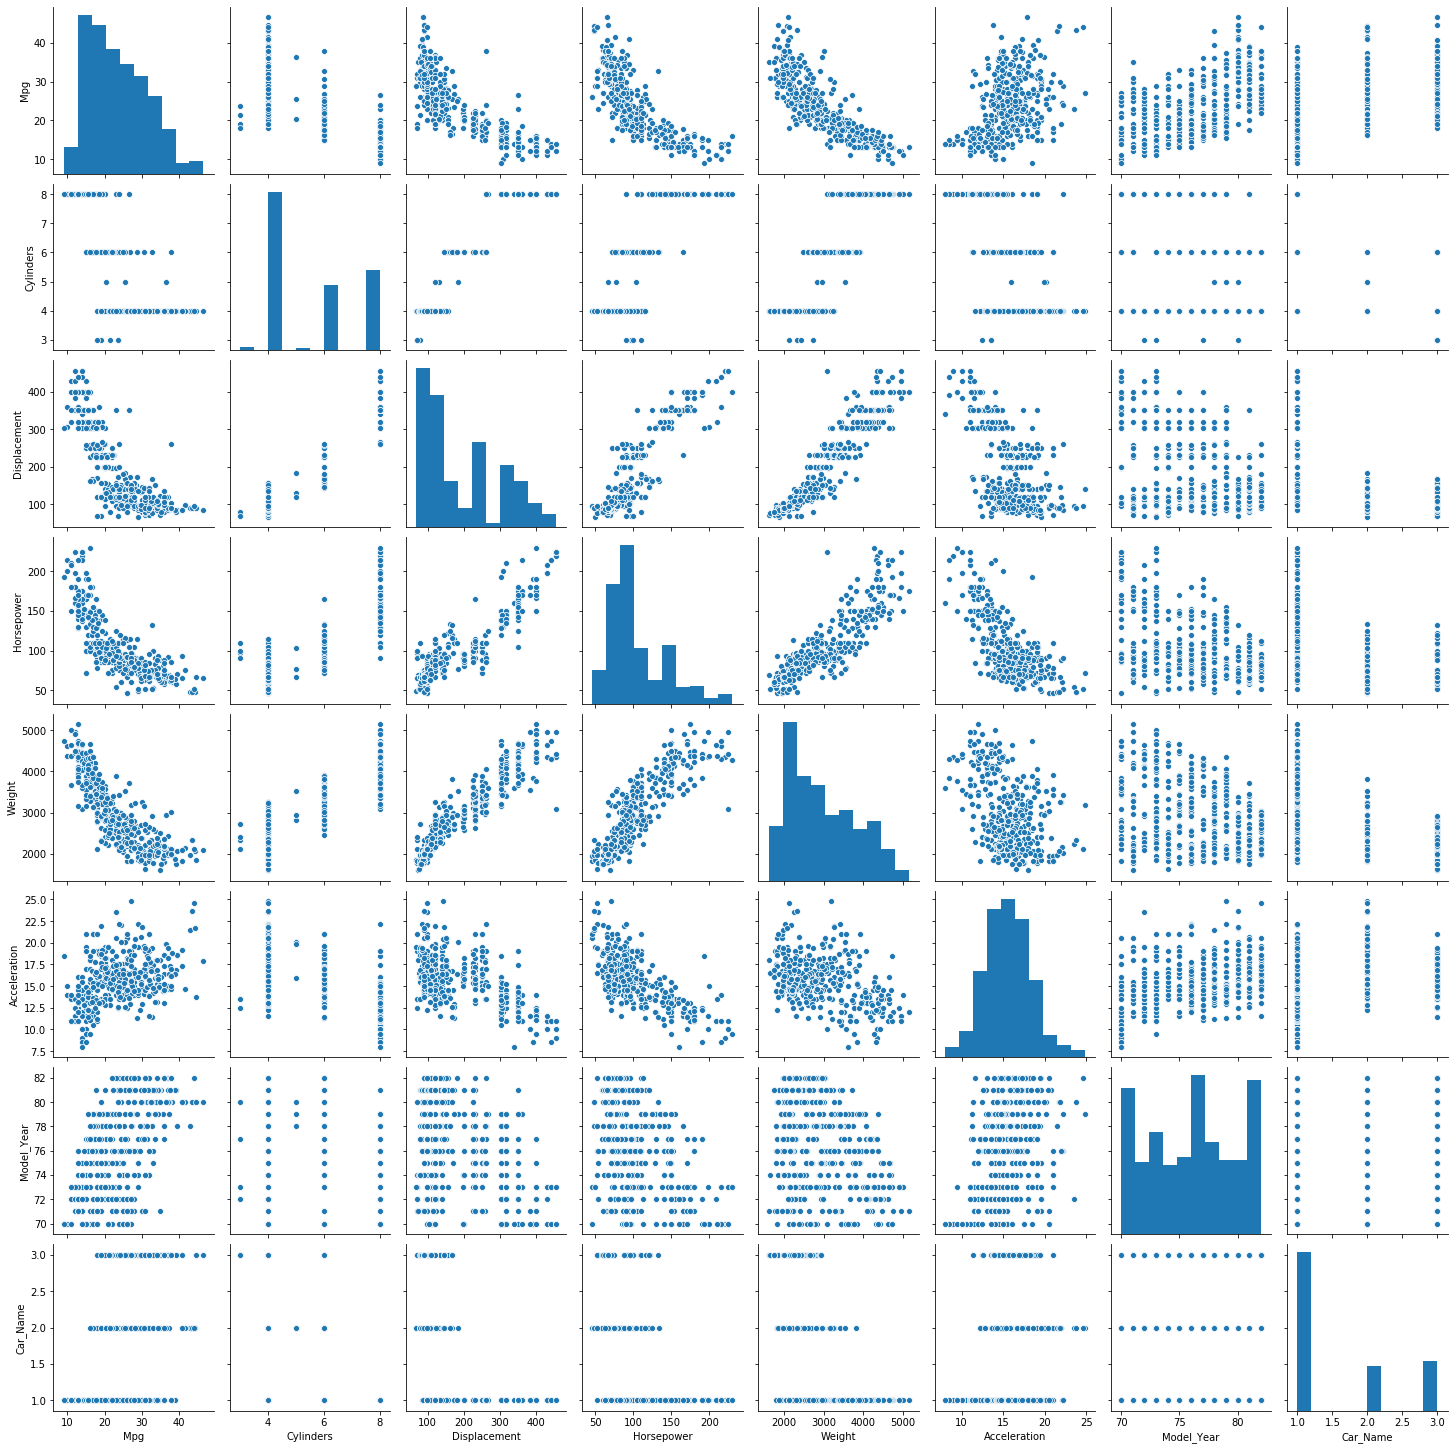

In [239]:
sns.pairplot(df)

In [240]:
# Plootiing Outliers
df.columns

Index(['Mpg', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_Year', 'Car_Name'],
      dtype='object')

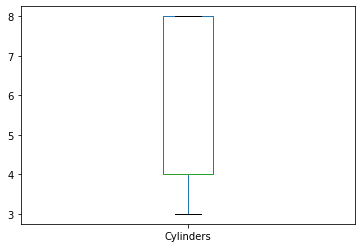

In [241]:
df['Cylinders'].plot.box()

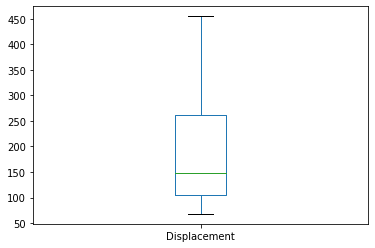

In [242]:
df['Displacement'].plot.box()

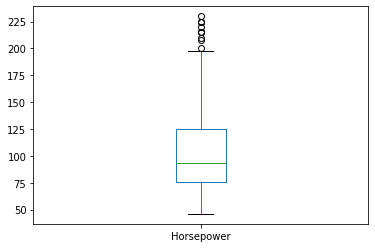

In [243]:
df['Horsepower'].plot.box()

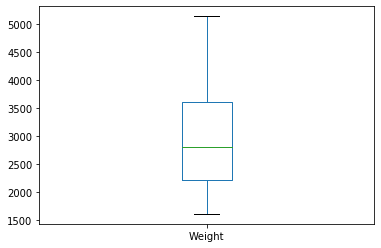

In [244]:
df['Weight'].plot.box()

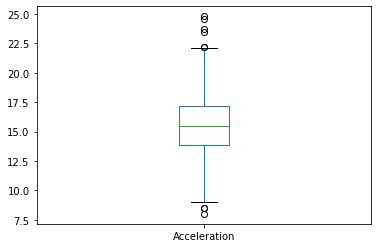

In [245]:
df['Acceleration'].plot.box()

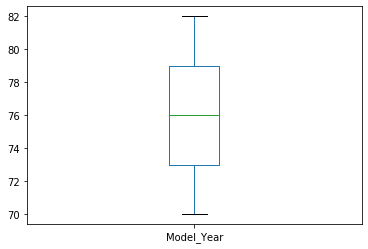

In [246]:
df['Model_Year'].plot.box()

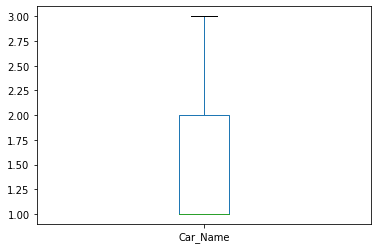

In [247]:
df['Car_Name'].plot.box()

In [248]:
# To check distribution of skewness
df.columns

Index(['Mpg', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_Year', 'Car_Name'],
      dtype='object')

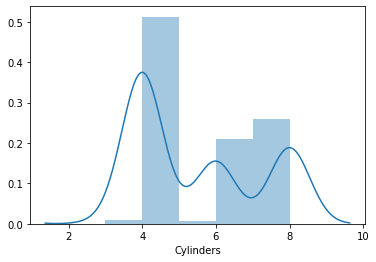

In [249]:
sns.distplot(df['Cylinders'])

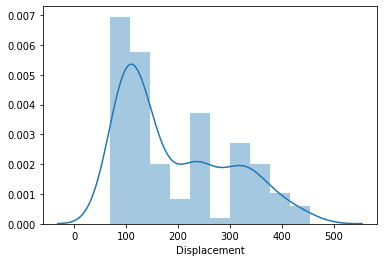

In [250]:
sns.distplot(df['Displacement'])

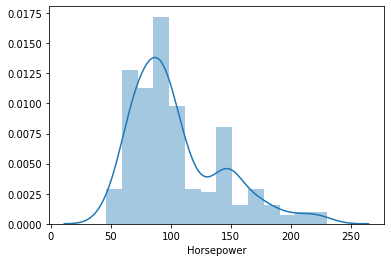

In [251]:
sns.distplot(df['Horsepower'])

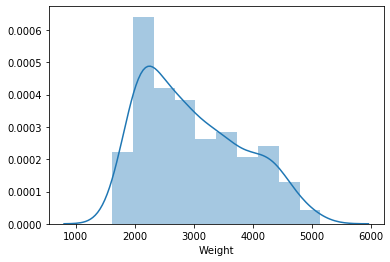

In [252]:
sns.distplot(df['Weight'])

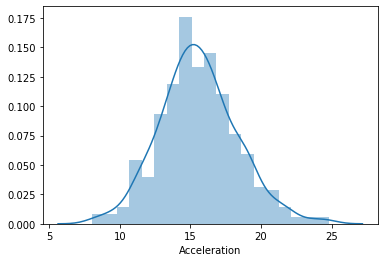

In [253]:
sns.distplot(df['Acceleration'])

In [254]:
# To Removing Skewness using log
df["Cylinders"]=np.log1p(df["Cylinders"])

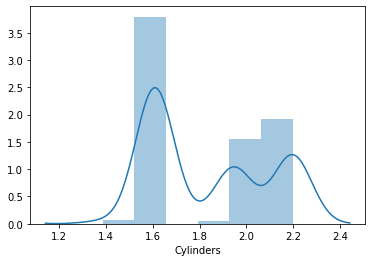

In [255]:
sns.distplot(df['Cylinders'])

In [256]:
# Again using sqrt function
df["Cylinders"]=np.sqrt(df["Cylinders"])

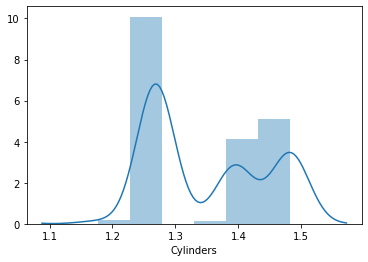

In [257]:
sns.distplot(df['Cylinders'])

In [258]:
# No changes... so again using boxcox method
from scipy.stats import boxcox
df["Cylinders"]=boxcox(df["Cylinders"],0)

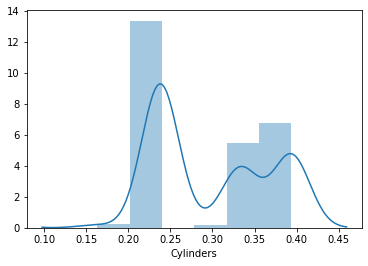

In [259]:
sns.distplot(df['Cylinders'])

Removing Outliers using Zscore

In [260]:
from scipy.stats import zscore
print(df.shape)
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)

(398, 8)
(391, 8)


In [261]:
# 7 rows are deleted as an outliers

In [262]:
# Now Spliting the data into x and y
x=df_new.iloc[:,1:]
y=pd.DataFrame(df_new.iloc[:,0])
print(x.shape)
print(y.shape)

(391, 7)
(391, 1)


In [263]:
# Now removing skewness in x
x.skew()

Cylinders       0.337909
Displacement    0.690697
Horsepower      0.989968
Weight          0.542438
Acceleration    0.217097
Model_Year      0.004518
Car_Name        0.911256
dtype: float64

In [264]:
#using sqrt function to reduce skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [265]:
x.skew()

Cylinders       0.337909
Displacement    0.455655
Horsepower      0.663337
Weight          0.542438
Acceleration    0.217097
Model_Year      0.004518
Car_Name        0.812946
dtype: float64

In [266]:
#as the skewness needs to be reduced again, we use log function to reduce
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.log1p(x[i])

In [267]:
x.skew()

Cylinders       0.337909
Displacement    0.455655
Horsepower      0.351962
Weight          0.542438
Acceleration    0.217097
Model_Year      0.004518
Car_Name        0.761737
dtype: float64

In [268]:
x.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_Year,Car_Name
0,0.393598,17.521415,2.517838,3504.0,12.0,70,0.693147
1,0.393598,18.708287,2.627941,3693.0,11.5,70,0.693147
2,0.393598,17.832555,2.583805,3436.0,11.0,70,0.693147
3,0.393598,17.435596,2.583805,3433.0,12.0,70,0.693147
4,0.393598,17.378147,2.551954,3449.0,10.5,70,0.693147


In [269]:
# I can drop Model_year as it has no direct impact on "Mpg"
x.drop("Model_Year",axis=1,inplace=True)

In [270]:
x.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Car_Name
0,0.393598,17.521415,2.517838,3504.0,12.0,0.693147
1,0.393598,18.708287,2.627941,3693.0,11.5,0.693147
2,0.393598,17.832555,2.583805,3436.0,11.0,0.693147
3,0.393598,17.435596,2.583805,3433.0,12.0,0.693147
4,0.393598,17.378147,2.551954,3449.0,10.5,0.693147


Applying Standardscaler for scaling data

In [271]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5
0,1.424303,1.177118,0.875470,0.654337,-1.370365,-0.742108
1,1.424303,1.511356,1.612962,0.880032,-1.561018,-0.742108
2,1.424303,1.264739,1.317331,0.573135,-1.751672,-0.742108
3,1.424303,1.152950,1.317331,0.569552,-1.370365,-0.742108
4,1.424303,1.136772,1.103989,0.588659,-1.942325,-0.742108


In [272]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [273]:
def maxr2_score(regr,x,y):
    max_r2_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2score=r2_score(y_test,y_pred)
        print("The r2 score at r state", r_state, "is", r2score )
        if r2score>max_r2_score:
            max_r2_score=r2score
            final_r_state=r_state
    print("The max r2 score", max_r2_score, "is achieved at r_state", final_r_state)
    return final_r_state

In [274]:
# Lets Use Linear Regression And check Max r2 score corresponding to different random states
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

The r2 score at r state 42 is 0.6825225524528543
The r2 score at r state 43 is 0.7542626456345395
The r2 score at r state 44 is 0.6824355856485834
The r2 score at r state 45 is 0.6914597815506667
The r2 score at r state 46 is 0.6427989467592801
The r2 score at r state 47 is 0.6593923987828582
The r2 score at r state 48 is 0.7396452327173547
The r2 score at r state 49 is 0.6980554998381021
The r2 score at r state 50 is 0.7019514410995731
The r2 score at r state 51 is 0.7389112975655333
The r2 score at r state 52 is 0.6404432132464821
The r2 score at r state 53 is 0.7027508812624075
The r2 score at r state 54 is 0.6818923727472102
The r2 score at r state 55 is 0.7397853456073431
The r2 score at r state 56 is 0.707879034675931
The r2 score at r state 57 is 0.7618618244071065
The r2 score at r state 58 is 0.6351567794700623
The r2 score at r state 59 is 0.7802463615919535
The r2 score at r state 60 is 0.734327709066496
The r2 score at r state 61 is 0.763725514634865
The r2 score at r state

In [275]:
# lets use GridSearchCV to find optimalvalue of n-neighbors for KNN Model
from sklearn.model_selection import GridSearchCV
neighbors={"n_neighbors":range(1,30)}
KNR=KNeighborsRegressor()
gknr=GridSearchCV(KNR,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 15}

In [276]:
# Lets use KNR and check max r2 score corresponding to different random states
KNR=KNeighborsRegressor(n_neighbors=15)
r_state=maxr2_score(KNR,x,y)

The r2 score at r state 42 is 0.6803348338000568
The r2 score at r state 43 is 0.7666137865319733
The r2 score at r state 44 is 0.6902068231566179
The r2 score at r state 45 is 0.664165537806555
The r2 score at r state 46 is 0.6840670982242312
The r2 score at r state 47 is 0.6947379402232481
The r2 score at r state 48 is 0.7214478497886991
The r2 score at r state 49 is 0.6953560833170571
The r2 score at r state 50 is 0.6950778156787967
The r2 score at r state 51 is 0.7917324913797874
The r2 score at r state 52 is 0.66596963067613
The r2 score at r state 53 is 0.7172810644777665
The r2 score at r state 54 is 0.6699026386218943
The r2 score at r state 55 is 0.739798187303442
The r2 score at r state 56 is 0.7641053521728365
The r2 score at r state 57 is 0.8164175370739974
The r2 score at r state 58 is 0.6460412730373498
The r2 score at r state 59 is 0.7964991340665821
The r2 score at r state 60 is 0.7532128728500543
The r2 score at r state 61 is 0.7551146360060446
The r2 score at r state 

In [277]:
# lets use GridSearchCV to find optimalvalue of kernel for SVR Model
parameters={"kernel":["linear",'poly','rbf'],"C":[1,10]}
sv=SVR()
gsv=GridSearchCV(sv,parameters,cv=10)
gsv.fit(x,y)
gsv.best_params_

{'C': 10, 'kernel': 'rbf'}

In [278]:
# Lets use SVR and check max r2 score corresponding to different random states
sv=SVR(kernel="rbf",C=10)
r_state=maxr2_score(sv,x,y)

The r2 score at r state 42 is 0.7605950871726144
The r2 score at r state 43 is 0.7228755222760239
The r2 score at r state 44 is 0.7176522101622826
The r2 score at r state 45 is 0.625095366427928
The r2 score at r state 46 is 0.6852661172442478
The r2 score at r state 47 is 0.7353689461268602
The r2 score at r state 48 is 0.7156221894414259
The r2 score at r state 49 is 0.6738205969661972
The r2 score at r state 50 is 0.7184517206279197
The r2 score at r state 51 is 0.7824155517293925
The r2 score at r state 52 is 0.6321446186022883
The r2 score at r state 53 is 0.6998890789767609
The r2 score at r state 54 is 0.6838846051953522
The r2 score at r state 55 is 0.7530218705991059
The r2 score at r state 56 is 0.785888637864477
The r2 score at r state 57 is 0.8395983976455937
The r2 score at r state 58 is 0.6667096579437006
The r2 score at r state 59 is 0.8263471717541584
The r2 score at r state 60 is 0.738447724428389
The r2 score at r state 61 is 0.7492691942882992
The r2 score at r state

In [279]:
# lets check the mean r2 score , standard deviation of LinearRegressor, KNR ,SVR
print("score for LinearRegression :",cross_val_score(lr,x,y,cv=10,scoring="r2"))
print("Mean r2 score for LinearRegression :",cross_val_score(lr,x,y,cv=10,scoring="r2").mean())
print("Standard Deviation in r2 score for LinearRegression :",cross_val_score(lr,x,y,cv=10,scoring="r2").std())  
print("")
print("score for KNR :",cross_val_score(KNR,x,y,cv=10,scoring="r2"))
print("Mean r2 score for KNR :",cross_val_score(KNR,x,y,cv=10,scoring="r2").mean())
print("Standard Deviation in r2 score for KNR :",cross_val_score(KNR,x,y,cv=10,scoring="r2").std())  
print("")
print("score for SVR :",cross_val_score(sv,x,y,cv=10,scoring="r2"))
print("Mean r2 score for SVR :",cross_val_score(sv,x,y,cv=10,scoring="r2").mean())
print("Standard Deviation in r2 score for SVR :",cross_val_score(sv,x,y,cv=10,scoring="r2").std())  
print("")


score for LinearRegression : [ 0.6587337   0.61628622  0.22037988  0.66276221  0.64511632  0.84419587
  0.73269499  0.66296148 -0.6081379  -0.07072099]
Mean r2 score for LinearRegression : 0.43642717814531673
Standard Deviation in r2 score for LinearRegression : 0.4332329381530967

score for KNR : [ 0.76409362  0.57332682  0.29435295  0.76077936  0.71082369  0.79890942
  0.73685881  0.64275019 -0.3077303  -0.06865921]
Mean r2 score for KNR : 0.4905505336984149
Standard Deviation in r2 score for KNR : 0.37021624054306135

score for SVR : [ 0.84293864  0.6301727   0.59634931  0.80511971  0.7342249   0.81060332
  0.74936189  0.6966944  -0.89173139 -0.13541926]
Mean r2 score for SVR : 0.48383142438284654
Standard Deviation in r2 score for SVR : 0.5317140680050241



In [280]:
# Based on above output SVR is performing well

In [281]:
# Lets check Lasso Regression and find best value of alpha
lsreg=Lasso()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [282]:
# Lets Check Max r2 score when we use Lasso
lareg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x,y)

The r2 score at r state 42 is 0.6685300656458751
The r2 score at r state 43 is 0.7274335267528254
The r2 score at r state 44 is 0.6523673017862497
The r2 score at r state 45 is 0.6600436729398063
The r2 score at r state 46 is 0.6781875331681746
The r2 score at r state 47 is 0.6239232231295558
The r2 score at r state 48 is 0.7012732428301873
The r2 score at r state 49 is 0.6585058196871889
The r2 score at r state 50 is 0.7179080739789667
The r2 score at r state 51 is 0.6827418632557039
The r2 score at r state 52 is 0.6332718754586393
The r2 score at r state 53 is 0.6304309956659486
The r2 score at r state 54 is 0.6307859512472196
The r2 score at r state 55 is 0.7256769840533814
The r2 score at r state 56 is 0.7137592100265169
The r2 score at r state 57 is 0.7313876660151432
The r2 score at r state 58 is 0.6200231721659153
The r2 score at r state 59 is 0.7428685884020505
The r2 score at r state 60 is 0.7011612315416649
The r2 score at r state 61 is 0.6959743708352757
The r2 score at r st

In [283]:
# Lets Check Cross Val Score With Lasso
print("score for LassoRegression :",cross_val_score(lsreg,x,y,cv=10,scoring="r2"))
print("Mean r2 score for LassoRegression :",cross_val_score(lsreg,x,y,cv=10,scoring="r2").mean())
print("Standard Deviation in r2 score for LassoRegression :",cross_val_score(lsreg,x,y,cv=10,scoring="r2").std())  
print("")


score for LassoRegression : [ 0.67904221  0.62450688  0.24578324  0.67996264  0.67136741  0.84353699
  0.70218529  0.59541072 -1.1086305  -0.17551104]
Mean r2 score for LassoRegression : 0.3757653836069409
Standard Deviation in r2 score for LassoRegression : 0.5684718282453118



In [284]:
# KNR Performed well among all the models

In [285]:
# Now We will try to use Ensemble techniques to boosting the models
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.0001,0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=10)
clf.fit(x,y)
clf.best_params_


{'learning_rate': 0.01, 'n_estimators': 1000}

In [286]:
# Lets use gbr and check max r2 score corresponding to different random states
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
r_state=maxr2_score(gbr,x,y)

The r2 score at r state 42 is 0.6830978823242495
The r2 score at r state 43 is 0.7561044593321858
The r2 score at r state 44 is 0.7629354749507464
The r2 score at r state 45 is 0.6550473670672159
The r2 score at r state 46 is 0.6110743588346073
The r2 score at r state 47 is 0.7567197542890386
The r2 score at r state 48 is 0.7327856253180112
The r2 score at r state 49 is 0.7091498484787735
The r2 score at r state 50 is 0.6482172507619564
The r2 score at r state 51 is 0.7968921711732995
The r2 score at r state 52 is 0.6591619702764849
The r2 score at r state 53 is 0.7353782559486806
The r2 score at r state 54 is 0.7084859700641164
The r2 score at r state 55 is 0.7436465427171155
The r2 score at r state 56 is 0.7872756126353533
The r2 score at r state 57 is 0.8263842836354908
The r2 score at r state 58 is 0.62352561530376
The r2 score at r state 59 is 0.8324498052561381
The r2 score at r state 60 is 0.7237450807654315
The r2 score at r state 61 is 0.8325209447024563
The r2 score at r stat

In [287]:
# Lets Check Cross Val Score With gbr
print("score for gbr :",cross_val_score(gbr,x,y,cv=10,scoring="r2"))
print("Mean r2 score for gbr :",cross_val_score(gbr,x,y,cv=10,scoring="r2").mean())
print("Standard Deviation in r2 score for gbr :",cross_val_score(gbr,x,y,cv=10,scoring="r2").std())  
print("")

score for gbr : [ 0.71748896  0.68046688  0.42648801  0.68334426  0.53995982  0.82245451
  0.79678998  0.69961665 -0.43951976 -0.08944659]
Mean r2 score for gbr : 0.4843242600590331
Standard Deviation in r2 score for gbr : 0.39784657788781197



In [288]:
# Now lets use AdaBoostRegressor Algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.0001,0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lr,lsreg,sv,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_


{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 100}

In [289]:
ada_reg=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=0.001,n_estimators=1000)
print("score for AdaBoostRegressor  :",cross_val_score(ada_reg,x,y,cv=10,scoring="r2"))
print("Mean r2 score for AdaBoostRegressor :",cross_val_score(ada_reg,x,y,cv=10,scoring="r2").mean())
print("Standard Deviation in r2 score for AdaBoostRegressor :",cross_val_score(ada_reg,x,y,cv=10,scoring="r2").std())  
print("")

score for AdaBoostRegressor  : [ 0.7638034   0.67970838  0.55312666  0.74976349  0.49378285  0.8055369
  0.79085651  0.59949673 -0.65873938 -0.15260926]
Mean r2 score for AdaBoostRegressor : 0.4603845408656396
Standard Deviation in r2 score for AdaBoostRegressor : 0.46667275172596745



In [290]:
# As I tried Many models and till now KNR is the best 
# random state corresponding to highest r2_score (0.8164175370739974) is 57
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,test_size=.20)
KNR=KNeighborsRegressor(n_neighbors=15)
KNR.fit(x_train,y_train)
y_pred=KNR.predict(x_test)


In [291]:
# lets find RMSE and R2 Score using sklearn.metrics
from sklearn.metrics import mean_squared_error
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is :",r2_score(y_test,y_pred))

RMSE is : 2.8477851338849933
r2 score is : 0.8164175370739974


In [292]:
# Now Saving The file
from sklearn.externals import joblib
joblib.dump(KNR,"Auto_Mpg_Knr.pkl")

['Auto_Mpg_Knr.pkl']

In [293]:
knr_from_joblib=joblib.load("Auto_Mpg_Knr.pkl")

In [294]:
from sklearn.model_selection import cross_val_predict
score=cross_val_predict(knr_from_joblib,x,y,cv=10)

In [295]:
score

array([[16.23333333],
       [14.63333333],
       [15.72666667],
       [15.86666667],
       [15.72666667],
       [13.63333333],
       [13.63333333],
       [14.23333333],
       [14.84      ],
       [14.84      ],
       [14.67333333],
       [27.56      ],
       [20.2       ],
       [20.28      ],
       [21.14666667],
       [28.50666667],
       [33.7       ],
       [26.58666667],
       [28.3       ],
       [28.51333333],
       [25.38      ],
       [20.13333333],
       [13.46      ],
       [13.92666667],
       [13.8       ],
       [15.74      ],
       [28.50666667],
       [26.18666667],
       [28.55333333],
       [25.8       ],
       [21.14      ],
       [19.91333333],
       [19.87333333],
       [19.32      ],
       [19.90666667],
       [14.46666667],
       [13.7       ],
       [14.86666667],
       [15.5       ],
       [13.53333333],
       [13.9       ],
       [13.53333333],
       [20.19333333],
       [27.00666667],
       [19.50666667],
       [19